In [1]:
from grace.datasets import random_graph, dataset_from_graph
from grace.models.classifier import GCN
from grace.models.train import train_model

import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

/home/quantumjot/anaconda3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
G = random_graph()

In [3]:
pos = {idx: (node["x"], node["y"]) for idx, node in G.nodes(data=True)}

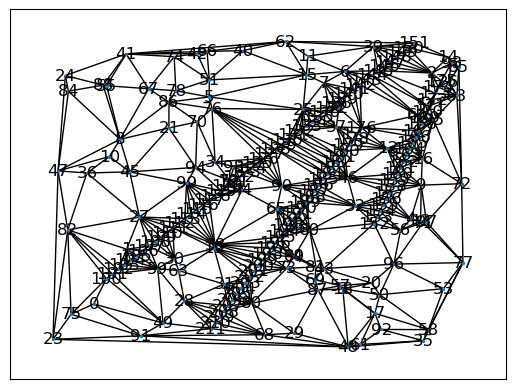

In [4]:
nx.draw_networkx(G, pos=pos, node_size=2, with_labels=True)

In [7]:
dataset = []

RNG = np.random.default_rng()

for i in range(100):
    G = random_graph(
        n_lines=RNG.integers(0, 10),
        n_chaff=RNG.integers(50, 1000),
        )
    d = dataset_from_graph(G)

    dataset += d

In [10]:
model = GCN(input_channels=3, hidden_channels=64)

train_model(model, dataset, epochs=100)

Epoch: 001, Train Acc: 0.8665, Test Acc: 0.8427
Epoch: 002, Train Acc: 0.8626, Test Acc: 0.8402
Epoch: 003, Train Acc: 0.8657, Test Acc: 0.8413
Epoch: 004, Train Acc: 0.8673, Test Acc: 0.8435
Epoch: 005, Train Acc: 0.8620, Test Acc: 0.8397
Epoch: 006, Train Acc: 0.8713, Test Acc: 0.8493
Epoch: 007, Train Acc: 0.8730, Test Acc: 0.8503
Epoch: 008, Train Acc: 0.8647, Test Acc: 0.8416
Epoch: 009, Train Acc: 0.8648, Test Acc: 0.8420
Epoch: 010, Train Acc: 0.8686, Test Acc: 0.8464
Epoch: 011, Train Acc: 0.8528, Test Acc: 0.8204
Epoch: 012, Train Acc: 0.8701, Test Acc: 0.8480
Epoch: 013, Train Acc: 0.8752, Test Acc: 0.8573
Epoch: 014, Train Acc: 0.8702, Test Acc: 0.8486
Epoch: 015, Train Acc: 0.8738, Test Acc: 0.8551
Epoch: 016, Train Acc: 0.8731, Test Acc: 0.8525
Epoch: 017, Train Acc: 0.8778, Test Acc: 0.8592
Epoch: 018, Train Acc: 0.8750, Test Acc: 0.8526
Epoch: 019, Train Acc: 0.8786, Test Acc: 0.8601
Epoch: 020, Train Acc: 0.8779, Test Acc: 0.8611
Epoch: 021, Train Acc: 0.8743, Test Acc:

In [32]:
test_G = random_graph(n_lines=10, n_chaff=300)
test_dataset = dataset_from_graph(test_G)

In [33]:
from scipy.special import softmax

In [34]:
model.eval()

predictions = []

for data in test_dataset:  # Iterate in batches over the training/test dataset.
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    probs = softmax(out.detach().numpy())

    predictions.append((int(pred.numpy()), probs))


In [35]:
pos = {idx: (node["x"], node["y"]) for idx, node in test_G.nodes(data=True)}

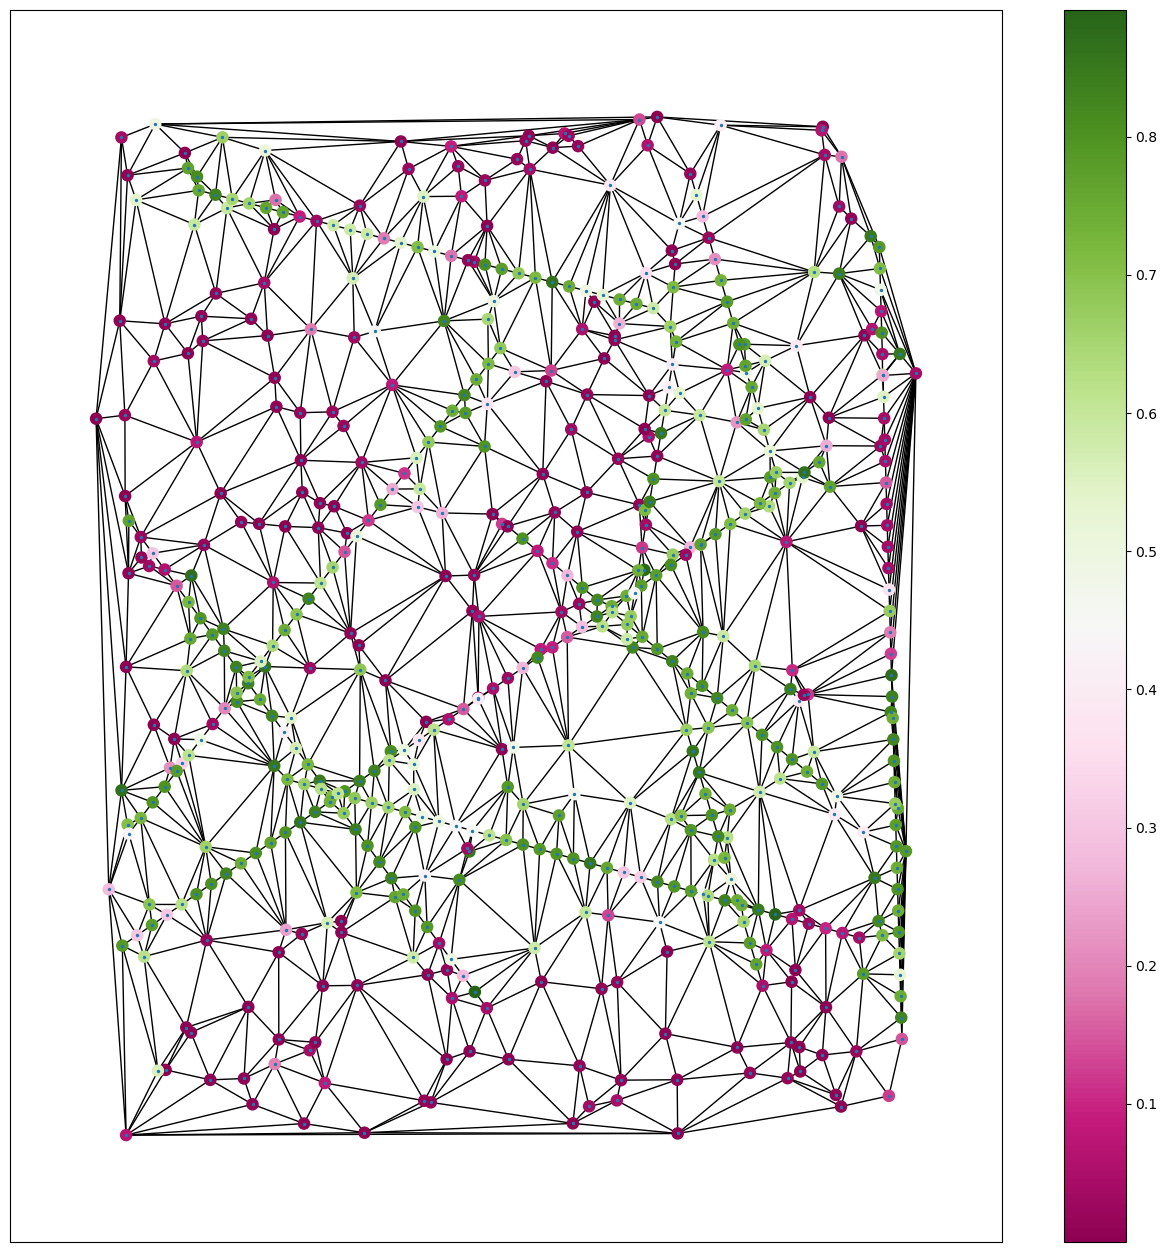

In [36]:
fig, ax = plt.subplots(figsize=(16, 16))
nx.draw_networkx(test_G, ax=ax, pos=pos, node_size=2, with_labels=False)

x = [p[0] for _, p in pos.items()]
y = [p[1] for _, p in pos.items()]

c = [pc[:, 1] for p, pc in predictions] 

scx = ax.scatter(x, y, s=64, c=c, cmap=plt.cm.PiYG)
fig.colorbar(scx)

In [16]:
len(predictions)

585